In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# HOME CREDIT INDONESIA SCORECARD MODEL
## Problem Statement:

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. **Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses.** Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan. Sebagai catatan, anda perlu menggunakan **setidaknya 2 model Machine Learning dimana salah satunya adalah Logistic Regression**. Setelah itu, buatlah slide presentasi yang mengandung analisa hasil pemodelan secara end-to-end beserta rekomendasi bisnisnya (maksimal 10 halaman)

Point:
1. Predict probability variable TARGET (sesuai contoh submission)
2. Pakai 2 model, salah satunya Logistic Regression
3. Cari top 2 insight (relate satu atau lebih variable dengan target atau yang lainnya) dan solusi
4. PPT

## Import Library dan Load Data
Pada tahap ini akan diimpport beberapa library Python yang diperlukan serta melakukan pembacaan data.

In [29]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
from matplotlib_venn import venn2
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Terdapat 9 data yang diberikan dengan data utama berupa data training dan data testing. Untuk sementara, analisis awal hanya akan menggunakan kedua data tersebut untuk membentuk model baseline yang dapat dikembangkan lebih jauh selanjutnya. Berikut adalah ukuran data training dan data testing.

In [30]:
%%time
train_df = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/application_train.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/RAKAMIN/application_test.csv')

print(f'Training data shape: {train_df.shape}')
print(f'Testing data shape: {test_df.shape}')

Training data shape: (307511, 122)
Testing data shape: (48744, 121)
CPU times: user 6.48 s, sys: 1.16 s, total: 7.64 s
Wall time: 16.2 s


Data training berjumlah 307511 dengan jumlah features sebanyak 122 sementara data test berjumlah 48733 dengan 121 fitur (tidak ada TARGET pada data test).


In [31]:
# Training dataset
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Testing dataset
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Terlihat bahwa pada kedua dataset terdapat kolom gender. Untuk menghindari bias, kolom ini akan dihapus.

In [33]:
train_df = train_df.drop(columns = 'CODE_GENDER')
test_df = test_df.drop(columns = 'CODE_GENDER')

## Exploratory Data Analysis

### Target Distribution:
Hal pertama yang perlu dilihat adalah distribusi dari kolom target dimana:
* TARGET 0 -> Pinjaman dibayar tepat waktu
* TARGET 1 -> Menandakan bahwa client mengalami kesulitan untuk membayar

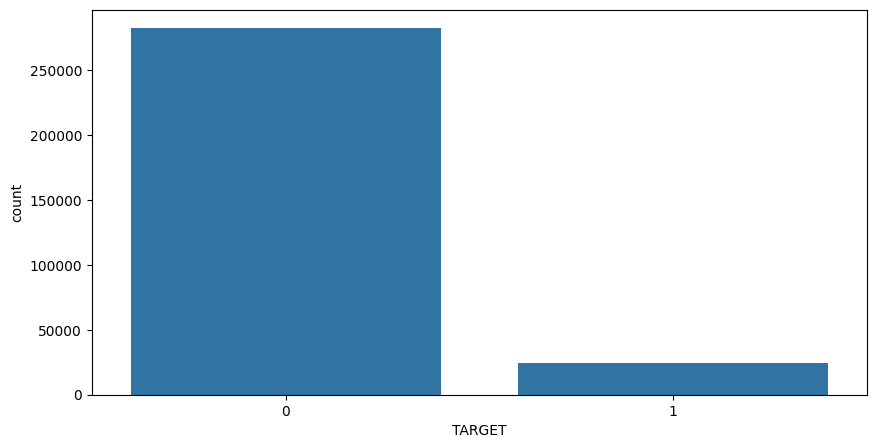

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=train_df['TARGET'])
plt.show()

Data tidak seimbang, lebih banyak TARGET 0 dibanding 1

Selanjutnya, kita lihat apakah data training dan test yang diberikan memiliki observasi yang overlap (terdapat data yang berada di kedua dataset sekaligus) atau tidak

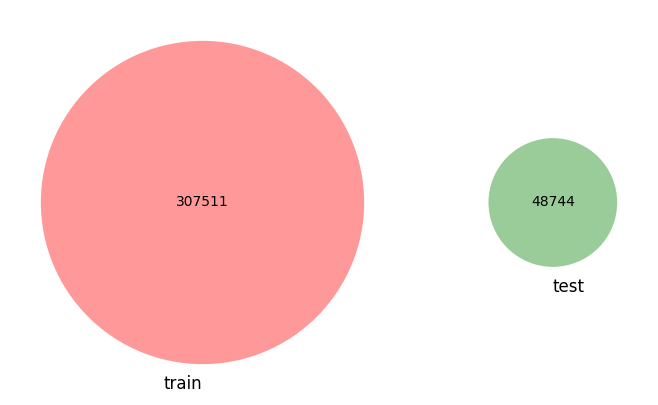

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
set1 = set(train_df.SK_ID_CURR.unique())
set2 = set(test_df.SK_ID_CURR.unique())

venn2([set1, set2], ('train', 'test'))
plt.show()

Terlihat pada gambar di atas bahwa tidak ada data yang overlap

## Menangani Missing Values

Selanjutnya adalah terkait penanganan missing values. Berikut tampilan beberapa data pertama dari dataset training dan dataset testing.

In [34]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values('% of Total', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [35]:
# Missing values statistics
missing_values = missing_values_table(train_df)
missing_values.head(10)
del missing_values

Your selected dataframe has 121 columns.
There are 67 columns that have missing values.


Terlihat bahwa terdapat 67 kolom pada data training. Keberadaan missing value tersebut akan mempengaruhi model yang akan dibangun nantinya. Terdapat beberapa cara yang dapat digunakan untuk mengataasi hal tersebut seperti mengisi data yang kosong tersebut atau pun menghapus kolom yang memiliki persentasi missing value yang besar. Namun, karena saat ini belum diketahui apakah kolom-kolom tersebut memiliki peran dalam memprediksi target, untuk saat ini data tidak akan diubah terlebih dahulu.

## Tipe Kolom
Berikut adalah tipe kolom pada dataset training

In [36]:
train_df.dtypes.value_counts()

float64    65
int64      41
object     15
dtype: int64

In [37]:
train_df.dtypes.head(10)

SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL      float64
AMT_CREDIT            float64
AMT_ANNUITY           float64
AMT_GOODS_PRICE       float64
dtype: object

Terdapat 65 kolom dengan tipe data `float64` dan 41 kolom dengantipe data `int64` yang keduanya merupakan data numerik. Lalu, terdapat juga 16 kolom dengan tipe `object` yang berisikan string dan merupakan data categorical seperti kode gender/jenis kelamin, nama kontrak, dsb.

Berikut adalah jumlah dari kategori pada masing-masing kolom yang bersifat categorical.

In [38]:
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [39]:
train_df.select_dtypes('object').apply(lambda x: x.unique(), axis=0).head(5)

NAME_CONTRACT_TYPE                        [Cash loans, Revolving loans]
FLAG_OWN_CAR                                                     [N, Y]
FLAG_OWN_REALTY                                                  [Y, N]
NAME_TYPE_SUITE       [Unaccompanied, Family, Spouse, partner, Child...
NAME_INCOME_TYPE      [Working, State servant, Commercial associate,...
dtype: object

## Encoding
Salah satu model yang diminta untuk dibuat pada problem statement adalah **logistic regression**. Model tersebut tidak bisa menangani variabel yang bersifat categorical. Oleh karena itu, diperlukan proses encoding pada variabel-variabel tersebut sehingga dapat direpresentasikan dengan angka.

Pada proses ini, data kategorikal yang hanya memiliki 2 unique values (atau kurang) akan melalui proses label encoding (menggunakan `LabelEncoder` dari Scikit-learn) sedangkan yang lainnya akan melalui proses one-hot encoding (menggunakan metode `get_dummies(df)` dari pandas).

In [40]:
# instansiasi objek label encoder
lab_en = preprocessing.LabelEncoder()
lab_en_count = 0

for col in train_df:
  if train_df[col].dtype == 'object':
    # If 2 or fewer unique categories
    if len(list(train_df[col].unique())) <= 2:
      print(f'label encoding: {col}')
      # Train on the training data
      lab_en.fit(train_df[col])
      # Transform
      train_df[col] = lab_en.transform(train_df[col])
      test_df[col] = lab_en.transform(test_df[col])

      lab_en_count += 1

print('%d columns were label encoded.' % lab_en_count)

label encoding: NAME_CONTRACT_TYPE
label encoding: FLAG_OWN_CAR
label encoding: FLAG_OWN_REALTY
3 columns were label encoded.


In [41]:
# one-hot encoding pada kolom categorical lainnya
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print('Training shape: ', train_df.shape)
print('Testing shape: ', test_df.shape)

Training shape:  (307511, 240)
Testing shape:  (48744, 237)


Terlihat bahwa pada setelah proses di atas, ukuran data training dan data testing berubah. Hal tersebut diakibatkan oleh proses one-hot encoding yang menghasilkan kolom-kolom baru. Terdapat ketidaksesuaian antara kolom yang dihasilkan pada data training dan data testing dimana seharusnya data training hanya memiliki tambahan satu kolom saja (kolom TARGET). Perlu dilakukan alignment antara data testing dan data training.

In [42]:
# Simpan kolom TARGET dari data training terlebih dahulu
train_labels = train_df['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_df, test_df = train_df.align(test_df, join = 'inner', axis = 1)
print('Training shape before: ', train_df.shape)
print('Testing shape before: ', test_df.shape)

# Kembalikan kolom target pada data training
train_df['TARGET'] = train_labels

print('Training shape after: ', train_df.shape)
print('Testing shape after: ', test_df.shape)

Training shape before:  (307511, 237)
Testing shape before:  (48744, 237)
Training shape after:  (307511, 238)
Testing shape after:  (48744, 237)


## Outlier
Pertama, kita lihat nilai variance dari masing-masing kolom

In [43]:
from tqdm import tqdm # feedback

In [44]:
train_df.var().sort_values().tail(20)

REGION_RATING_CLIENT          2.591155e-01
CNT_CHILDREN                  5.214593e-01
AMT_REQ_CREDIT_BUREAU_QRT     6.305244e-01
CNT_FAM_MEMBERS               8.293409e-01
AMT_REQ_CREDIT_BUREAU_MON     8.390604e-01
AMT_REQ_CREDIT_BUREAU_YEAR    3.494264e+00
OBS_60_CNT_SOCIAL_CIRCLE      5.663464e+00
OBS_30_CNT_SOCIAL_CIRCLE      5.764747e+00
HOUR_APPR_PROCESS_START       1.066566e+01
OWN_CAR_AGE                   1.426785e+02
DAYS_LAST_PHONE_CHANGE        6.836123e+05
DAYS_ID_PUBLISH               2.278441e+06
DAYS_REGISTRATION             1.241073e+07
DAYS_BIRTH                    1.904440e+07
AMT_ANNUITY                   2.100684e+08
SK_ID_CURR                    1.056582e+10
DAYS_EMPLOYED                 1.995884e+10
AMT_INCOME_TOTAL              5.622739e+10
AMT_GOODS_PRICE               1.364907e+11
AMT_CREDIT                    1.619988e+11
dtype: float64

Terlihat bahwa terdapat beberapa kolom dengan nilai variance yang sangat tinggi.

  0%|          | 0/10 [00:00<?, ?it/s]

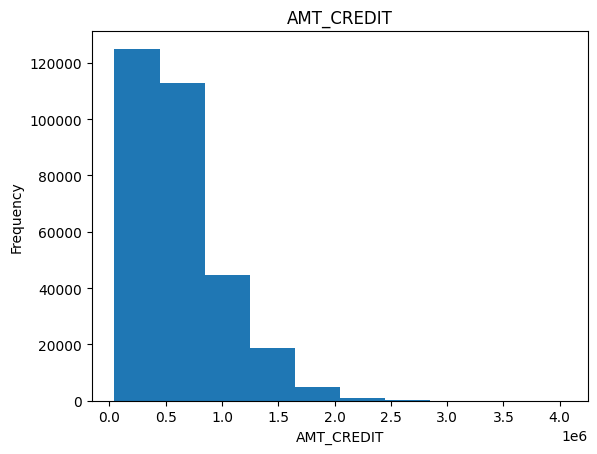

 10%|█         | 1/10 [00:00<00:02,  3.58it/s]

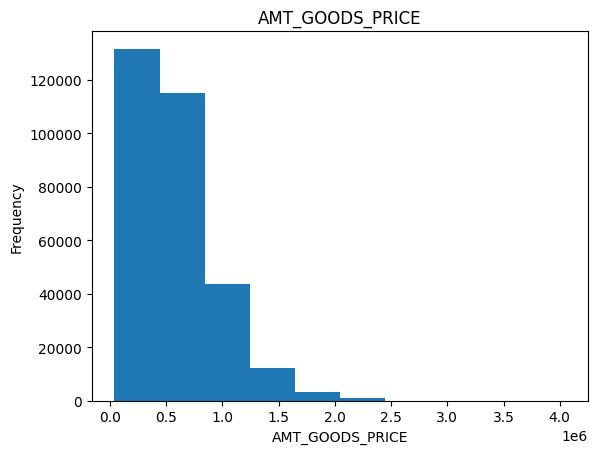

 20%|██        | 2/10 [00:00<00:02,  3.54it/s]

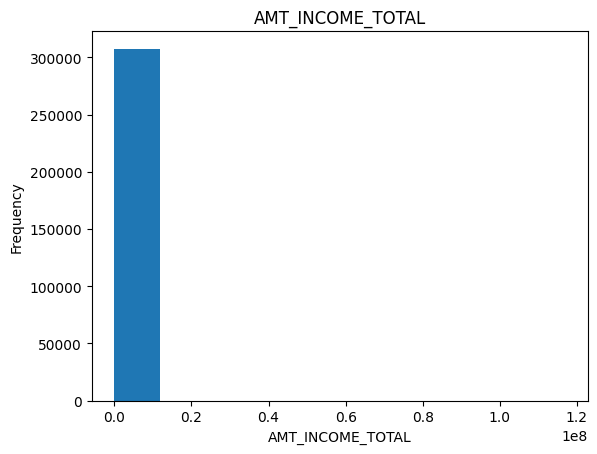

 30%|███       | 3/10 [00:00<00:01,  3.55it/s]

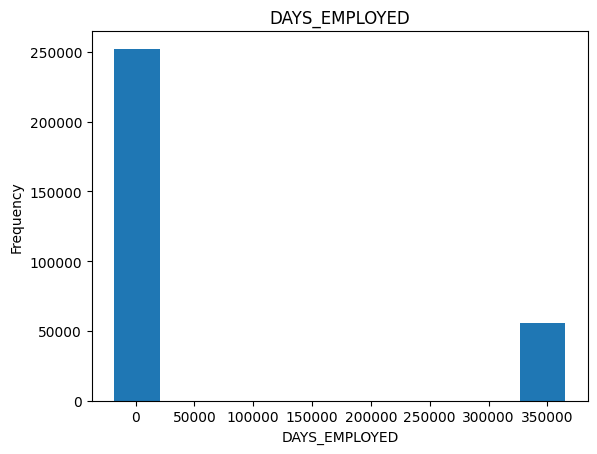

 40%|████      | 4/10 [00:01<00:01,  3.61it/s]

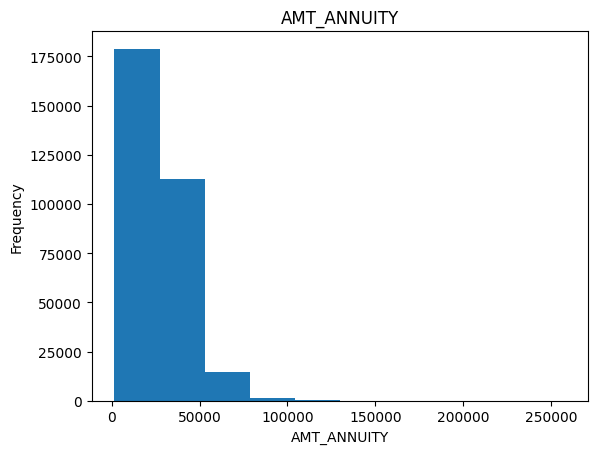

 50%|█████     | 5/10 [00:01<00:01,  3.57it/s]

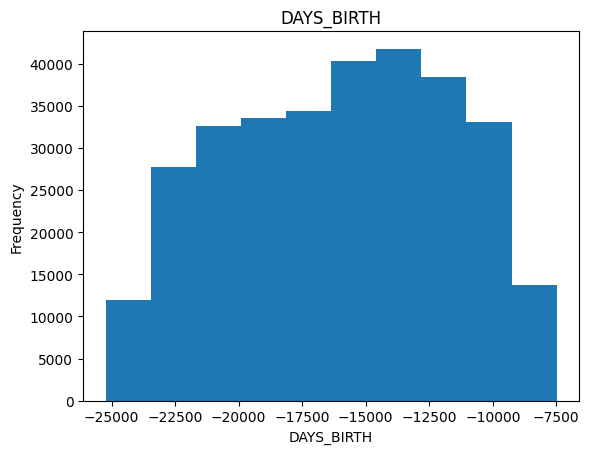

 60%|██████    | 6/10 [00:01<00:01,  3.48it/s]

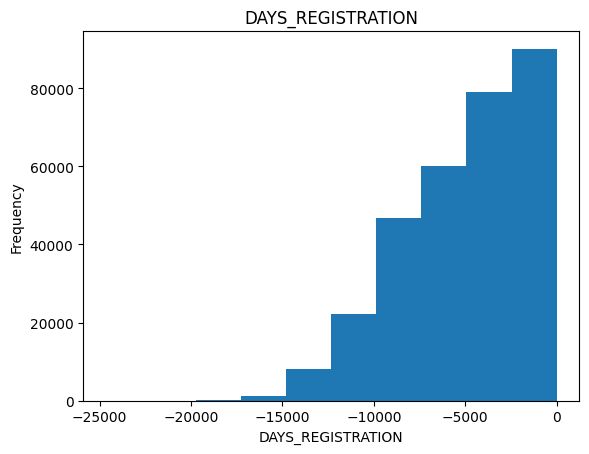

 70%|███████   | 7/10 [00:01<00:00,  3.59it/s]

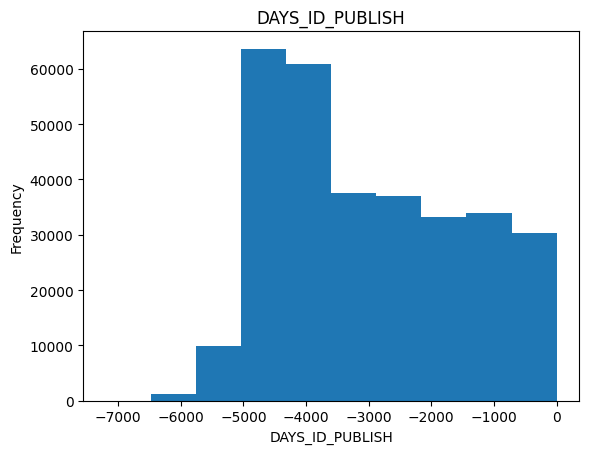

 80%|████████  | 8/10 [00:02<00:00,  3.55it/s]

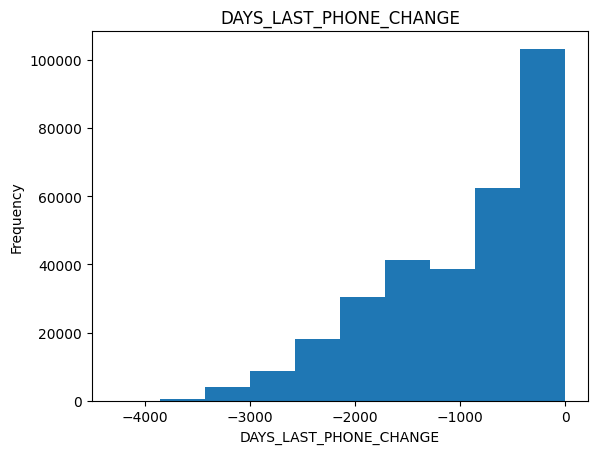

 90%|█████████ | 9/10 [00:02<00:00,  3.61it/s]

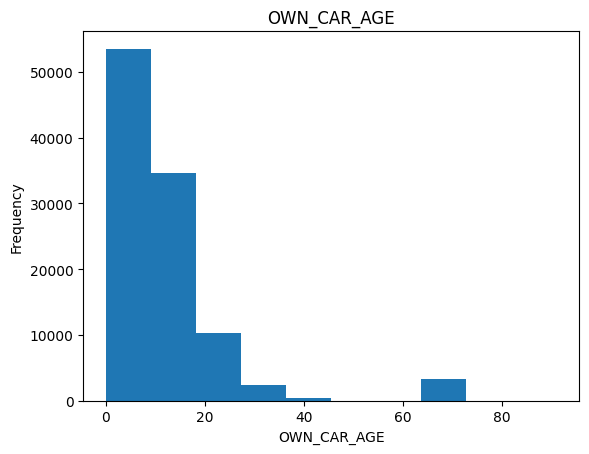

100%|██████████| 10/10 [00:02<00:00,  3.60it/s]


In [45]:
# Ambil 10 kolom dengan variance tertinggi
highest_var_cols = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AMT_ANNUITY',
                   'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'OWN_CAR_AGE']

# Plot pie charts for integer columns and distribution plots for float columns
for col in tqdm(highest_var_cols):
  train_df[col].plot.hist(title = col)
  plt.xlabel(col)
  plt.show()
del highest_var_cols

Dapat dilihat bahwa data-data berikut memiliki nilai variance yang besar. Terlihat juga bahwa pada plot distribusi data terdapat ketimpangan. Selanjutnya, akan kita cek kolom DAYS_EMPLOYED.

In [46]:
(train_df['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

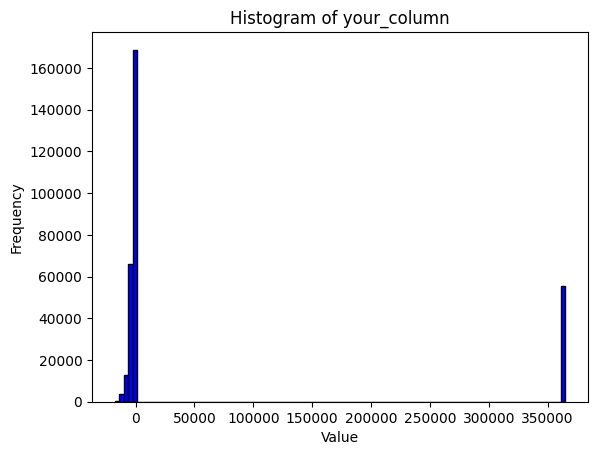

In [47]:
# Plot a histogram of the 'your_column' data
plt.hist(train_df['DAYS_EMPLOYED'], bins=100, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of your_column')

# Show the plot
plt.show()

Terlihat bahwa persebaran data tersebut tidak masuk akal. Data atau kolom tersebut menunjukan jumlah total hari kerja dari seorang client dan nilai terbesarnya mencapai 365243 hari (setara kurang lebih 1000 tahun). Selain itu, perhitungan DAYS_EMPLOYED seharusnya bernilai negatif. Kita lihat apakah ada data di antara value 5000 sampai 350000.

In [48]:
# Use boolean indexing to filter values within the specified range
filtered_values = train_df['DAYS_EMPLOYED'][(train_df['DAYS_EMPLOYED'] >= 5000) & (train_df['DAYS_EMPLOYED'] <= 350000)]

# Get the count of values within the specified range
len(filtered_values)

0

Sudah dipastikan bahwa tidak ada data DAYS_EMPLOYED lainnya di antara nilai 5000 - 350000. Karena sudah terlihat bahwa data outlier seluruhnya bernilai 365243, kita hanya perlu mengganti data dengan value tersebut dengan missing value untuk nanti dihandle menggunakan imputer

Text(0.5, 0, 'Days Employment')

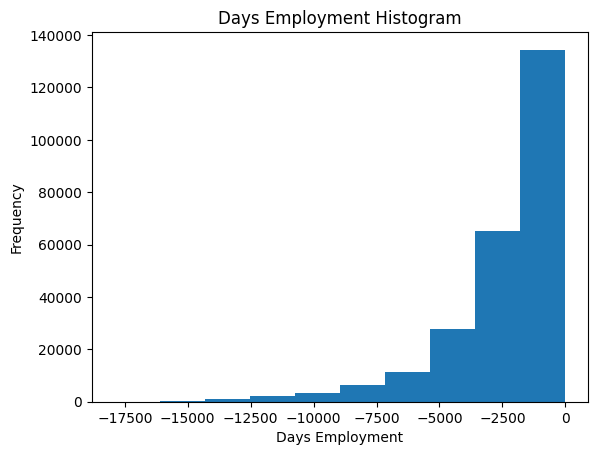

In [49]:
# Replace the anomalous values with nan
train_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

train_df["DAYS_EMPLOYED"].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

Hal yang sama diperlukan juga untuk dilakukan pada dataset testing

In [50]:
(test_df['DAYS_EMPLOYED']).describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [51]:
# Replace the anomalous values with nan
test_df["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

## Correlation

In [52]:
# Find correlations with the target and sort
correlations = train_df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                     

In [53]:
print('Columns with highest correlations:\n', abs(correlations).sort_values(ascending=False).head(20))
del correlations

Columns with highest correlations:
 TARGET                                               1.000000
EXT_SOURCE_3                                         0.178919
EXT_SOURCE_2                                         0.160472
EXT_SOURCE_1                                         0.155317
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
NAME_EDUCATION_TYPE_Higher education                 0.056593
DAYS_LAST_PHONE_CHANGE                               0.055218
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
NAME_INCOME_TYPE_Pensioner                           0.046209
ORGANIZATION_TYPE_XNA             

**Perlu diperhatikan** bahwa beberapa kolom memiliki nilai negatif seperti kolom DAYS_BIRTH dan DAYS_EMPLOYED. Hal tersebut menandakan bahwa korelasi sebenarnya dari DAYS_BIRTH terbalik atau negatif. Terlihat bahwa secara magnitude, dapat diurutkan kolom dengan korelasi terbesar dengan target yaitu kolom:

1. EXT_SOURCE_3
2. EXT_SOURCE_2
3. EXT_SOURCE_1
4. DAYS_BIRTH
5. DAYS_EMPLOYED
6. REGION_RATING_CLIENT_W_CITY
7. REGION_RATING_CLIENT
8.  NAME_INCOME_TYPE
9.   NAME_EDUCATION_TYPE

Beberapa insight:
1. Seseorang dengan EXT_SOURCE (diasumsikan external source income atau pendapatan eksternal) memiliki kecenderungan yang cukup besar untuk membayar
2. Seseorang yang telah pensiun cenderung untuk membayar, begitu juga dengan usia yang lebih tua
3. Pendidikan cukup memiliki korelasi yang besar dimana seseorang dengan status  pendidikan Higher education cenderung untuk membayar sedangkan seseorang dengan status pendidikan Secondary / secondary special cenderung untuk sebaliknya
4.

Selanjutnya akan dilakukan pengecekan ulang terhadap kolom-kolom tersebut untuk memastikan bahwa tidak ada outlier atau anomali pada data tersebut

  0%|          | 0/9 [00:00<?, ?it/s]

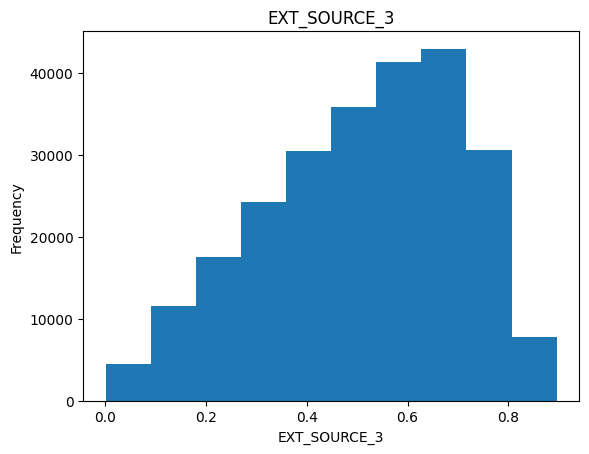

 11%|█         | 1/9 [00:00<00:01,  4.02it/s]

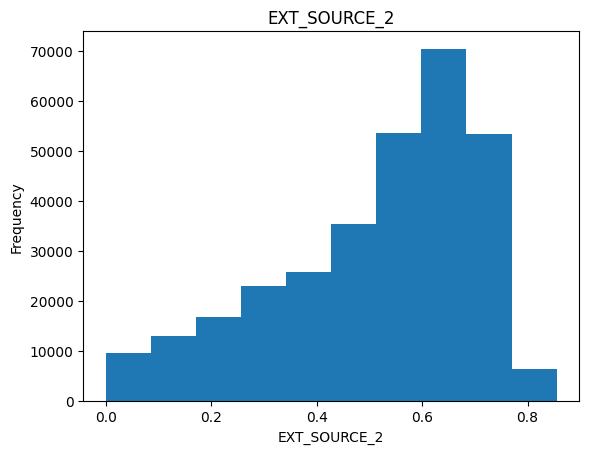

 22%|██▏       | 2/9 [00:00<00:01,  3.73it/s]

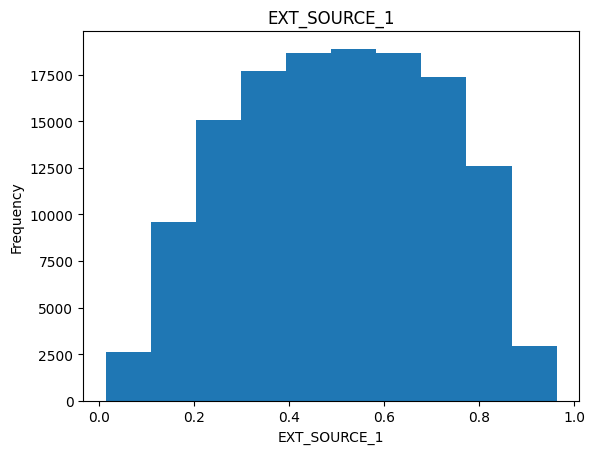

 33%|███▎      | 3/9 [00:00<00:01,  3.59it/s]

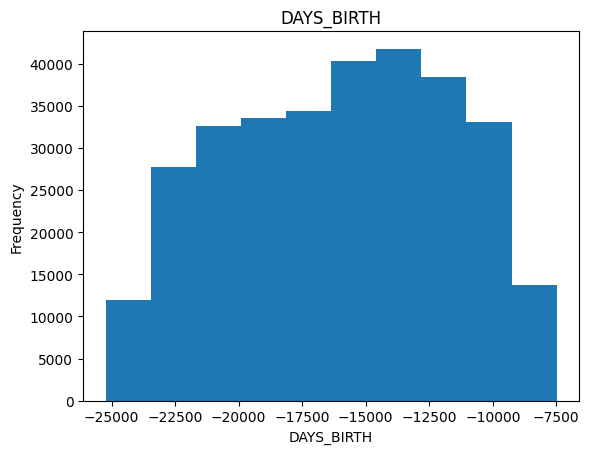

 44%|████▍     | 4/9 [00:01<00:01,  3.47it/s]

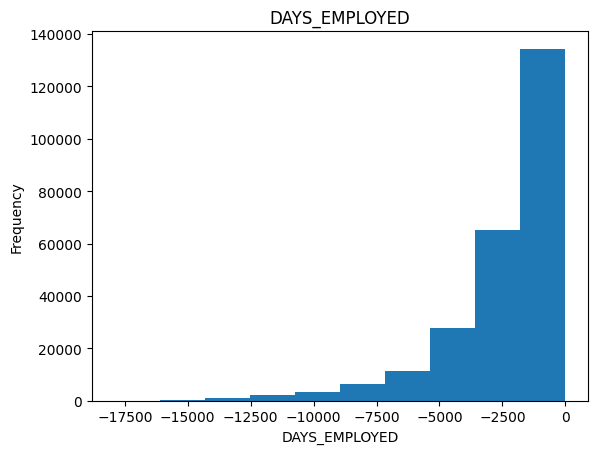

 56%|█████▌    | 5/9 [00:01<00:01,  3.39it/s]

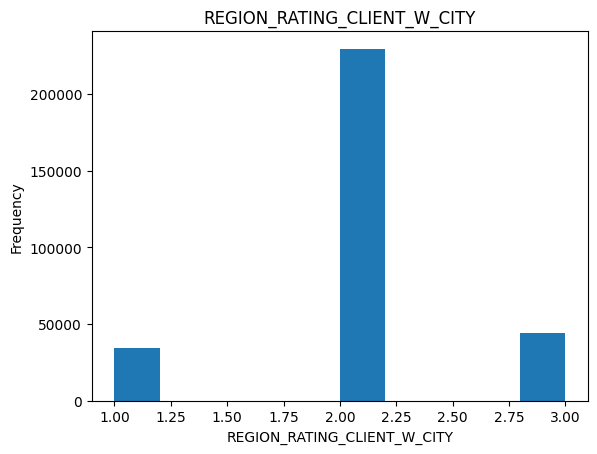

 67%|██████▋   | 6/9 [00:01<00:00,  3.47it/s]

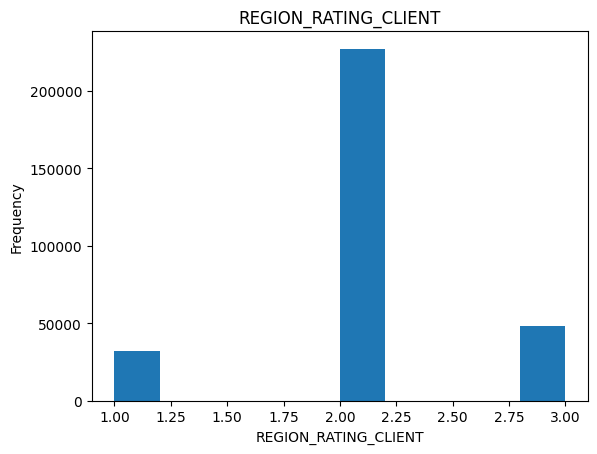

 78%|███████▊  | 7/9 [00:01<00:00,  3.47it/s]

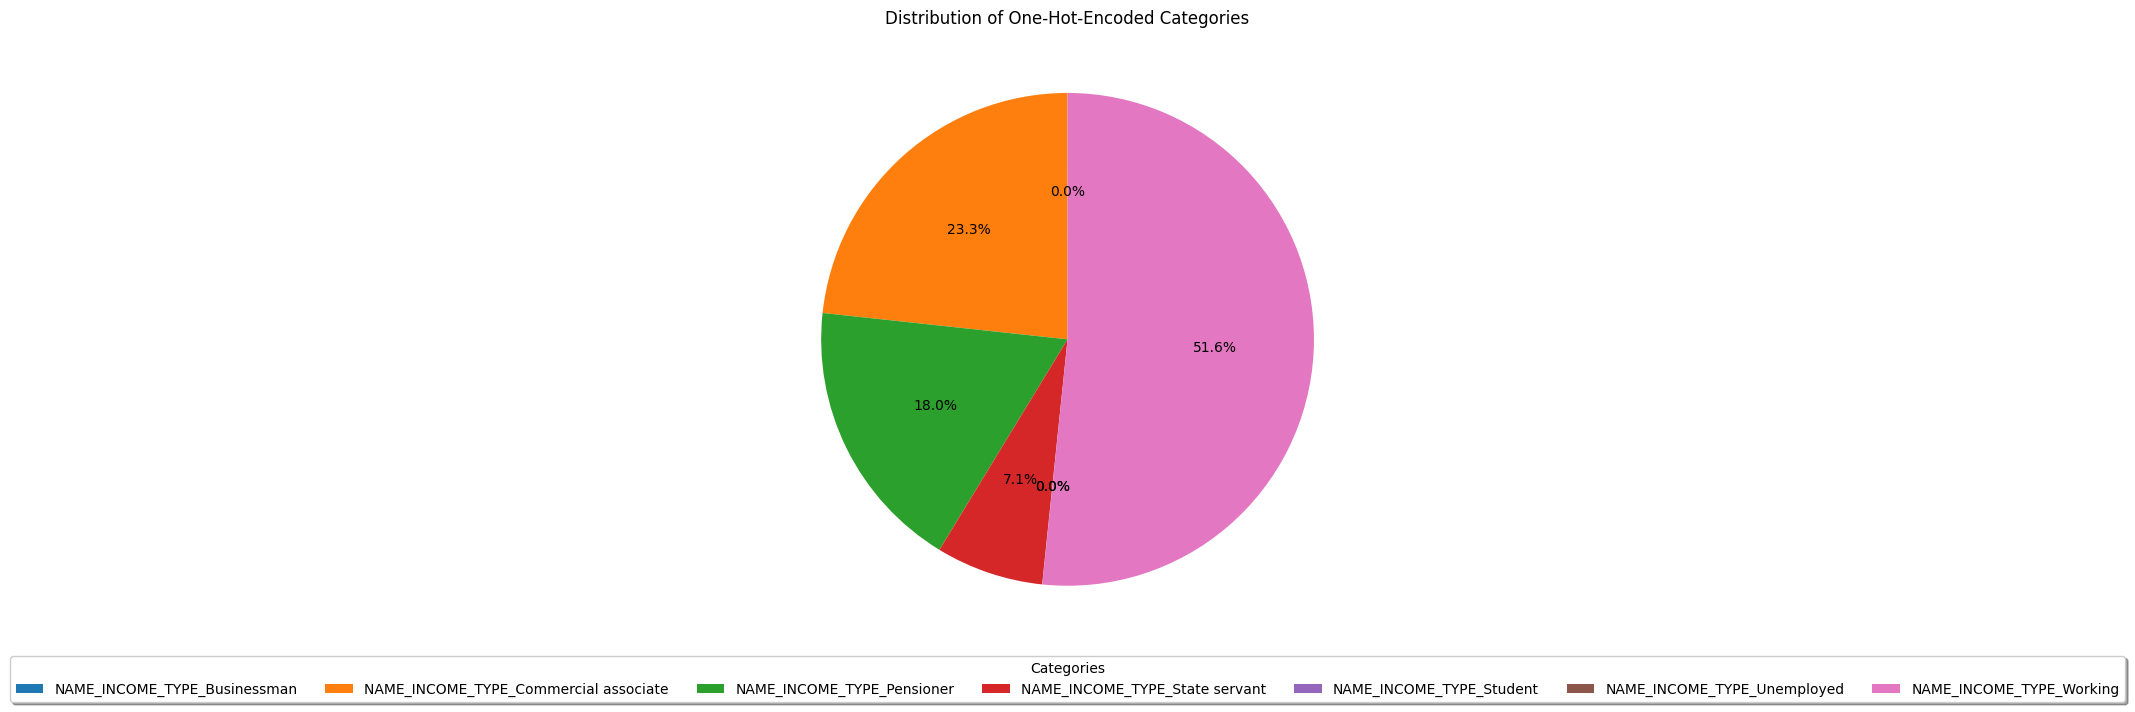

 89%|████████▉ | 8/9 [00:02<00:00,  2.70it/s]

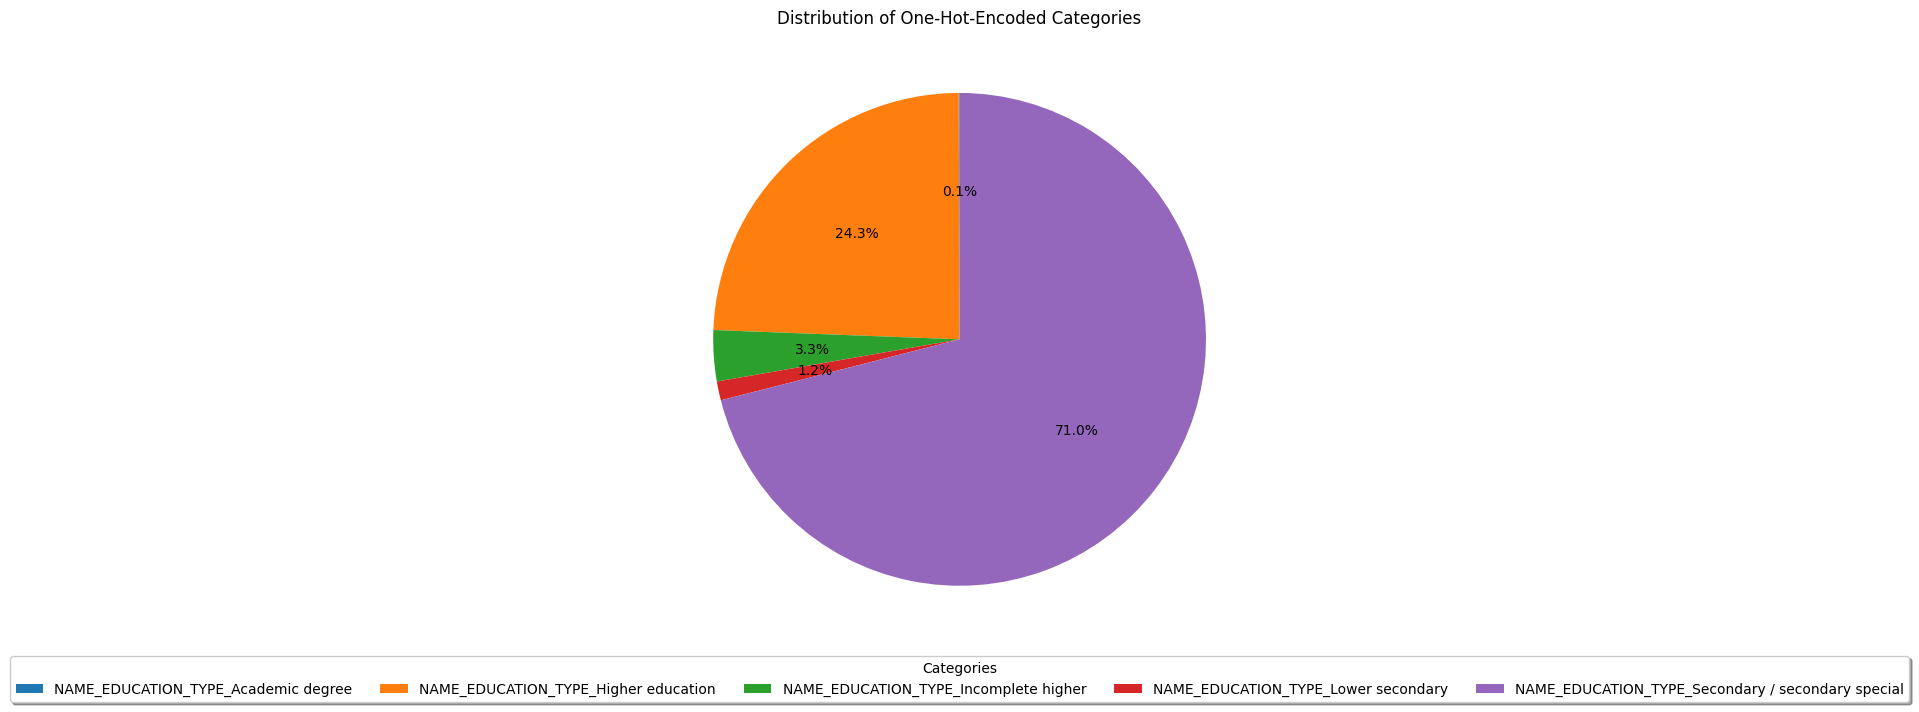

100%|██████████| 9/9 [00:02<00:00,  3.16it/s]


In [54]:
def draw_categorical_pie(cols):
    # Identify one-hot-encoded columns that start with 'Category'
    one_hot_columns = [col for col in train_df.columns if col.startswith(cols)]

    # Create a new DataFrame containing only the one-hot-encoded columns
    one_hot_df = train_df[one_hot_columns]

    # Calculate the sum of each one-hot-encoded column
    category_counts = one_hot_df.sum()

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of One-Hot-Encoded Categories')

    # Display labels at the bottom using legend
    plt.legend(category_counts.index, title="Categories", loc="lower center", bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(category_counts))

    plt.show()

columns = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
            'DAYS_BIRTH', 'DAYS_EMPLOYED',
            'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
            'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE']

for cols in tqdm(columns):
    if cols == 'NAME_INCOME_TYPE':
        draw_categorical_pie(cols)
    elif cols == 'NAME_EDUCATION_TYPE':
        draw_categorical_pie(cols)
    else:
        train_df[cols].plot.hist(title = cols)
        plt.xlabel(cols)
        plt.show()

Distribusi data terlihat normal. Beberapa insight yang didapat:
1. Urutan jumlah client berdasarkan income type: Working, commercial_associate, Pensioner, state_servant, diikuti yang lainnya
3. Urutan jumlah client berdasarkan status pendidikan: Secondary/secondary special, Higher education, Incomplete higher, Lower secondary, dan terakhir Academic degree

In [55]:
numeric_cols = columns = ['EXT_SOURCE_3',
'EXT_SOURCE_2',
'EXT_SOURCE_1',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'REGION_RATING_CLIENT_W_CITY',
'REGION_RATING_CLIENT']
missing_values = missing_values_table(train_df[numeric_cols])
missing_values

Your selected dataframe has 7 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total
EXT_SOURCE_1,173378,56.4
EXT_SOURCE_3,60965,19.8
DAYS_EMPLOYED,55374,18.0
EXT_SOURCE_2,660,0.2


Kolom EXT_SOURCE_1 memiliki banyak missing values, **ingat untuk menggunakan imputer untuk mengganti missing values**

In [56]:
def percent_defaulted(cols_prefix):
    # Filter columns that start with the specified prefix
    columns = [col for col in train_df.columns if col.startswith(cols_prefix)]

    category_counts = train_df.groupby('TARGET')[columns].sum()
    category_1_counts = category_counts.loc[1]
    category_0_counts = category_counts.loc[0]

    percentage_df = (100 * category_1_counts/(category_0_counts+category_1_counts)).sort_values(ascending=False)
    print(f'Percentage of defaulted client per {cols_prefix}:')
    print(percentage_df)
    print(f'Percentage of non-defaulted client per {cols_prefix}:')
    print(100-percentage_df)

In [57]:
percent_defaulted('NAME_INCOME_TYPE')

Percentage of defaulted client per NAME_INCOME_TYPE:
NAME_INCOME_TYPE_Unemployed              36.363636
NAME_INCOME_TYPE_Working                  9.588472
NAME_INCOME_TYPE_Commercial associate     7.484257
NAME_INCOME_TYPE_State servant            5.754965
NAME_INCOME_TYPE_Pensioner                5.386366
NAME_INCOME_TYPE_Businessman              0.000000
NAME_INCOME_TYPE_Student                  0.000000
dtype: float64
Percentage of non-defaulted client per NAME_INCOME_TYPE:
NAME_INCOME_TYPE_Unemployed               63.636364
NAME_INCOME_TYPE_Working                  90.411528
NAME_INCOME_TYPE_Commercial associate     92.515743
NAME_INCOME_TYPE_State servant            94.245035
NAME_INCOME_TYPE_Pensioner                94.613634
NAME_INCOME_TYPE_Businessman             100.000000
NAME_INCOME_TYPE_Student                 100.000000
dtype: float64


Poin menarik:
1. Seluruh bussinessman dan seluruh student membayar, tapi jumlah client tersebut sedikit. **Belum pasti jika client jenis ini lebih ramai semuanya akan membayar juga, tetapi ada baiknya dilakukan campaign dan juga taktik khusus seperti pinjaman pendidikan dengan metode bayar yang berbeda atau pinjaman bisnis dengan metode pembayaran berupa royalti  atau semacamnya (gaya sharktank)**
2. Client unemployed paling sulit membayar, jumlah client pun sedikit  **Perlu ada taktik seperti planning supaya client jenis ini lebih sering membayar**
3. Pensioner cenderung untuk membayar dan jumlah client tersebut juga banyak (18% dari total), **ada baiknya dilakukan campaign lebih terhadap tipe ini supaya lebih ramai pensiunan yang menggunakan jasa home credit**
4. Sisanya biasa saja dan hanya perlu ditingkatkan untuk state servant dan commercial associate, sementara working class client bisa digunakan taktik yang lebih umum

In [58]:
percent_defaulted('NAME_EDUCATION_TYPE')

Percentage of defaulted client per NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE_Lower secondary                  10.927673
NAME_EDUCATION_TYPE_Secondary / secondary special     8.939929
NAME_EDUCATION_TYPE_Incomplete higher                 8.484966
NAME_EDUCATION_TYPE_Higher education                  5.355115
NAME_EDUCATION_TYPE_Academic degree                   1.829268
dtype: float64
Percentage of non-defaulted client per NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE_Lower secondary                  89.072327
NAME_EDUCATION_TYPE_Secondary / secondary special    91.060071
NAME_EDUCATION_TYPE_Incomplete higher                91.515034
NAME_EDUCATION_TYPE_Higher education                 94.644885
NAME_EDUCATION_TYPE_Academic degree                  98.170732
dtype: float64


Poin menarik:
1. client dengan status pendidikan lower secondary (SMP/Sederajat) cenderung sulit untuk membayar dan jumlahnya pun sedikit, **perlu plan yang lebih cocok**
2. Semakin tinggi derajat pendidikan client semakin sering membayar, yang cukup menarik adalah client dengan higher education berjumlah cukup banyak (terbanyak kedua) dan lebih sering membayar (posisi kedua terakhir pada list kesulitan membayar), sehingga **pelanggan dengan status pendidikan Higher Education dapat dijadikan target utama**

## Model Baseline

Pertama-tama akan dibuat model baseline. Model dibangun dengan menggunakan data mentah (dan tanpa kolom gender)

### Preprocessing
Preprocessing data meliputi penanganan missing value dan scaling data (normalisasi) [TODO: train/validation split]

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [60]:
def preprocess(train_df, test_df):
    # Drop the target from the training data
    if 'TARGET' in train_df:
        train = train_df.drop(columns = ['TARGET'])
    else:
        train = train_df.copy()

    # Feature names
    features = list(train.columns)

    # Copy of the testing data
    test = test_df.copy()

    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler(feature_range = (0, 1))

    # Fit on the training data
    imputer.fit(train)

    # Transform both training and testing data
    train = imputer.transform(train)
    test = imputer.transform(test)

    # Repeat with the scaler
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)

    print('Training data shape: ', train.shape)
    print('Testing data shape: ', test.shape)
    return train, test, features

Untuk validasi akan menggunakan metode KFold Cross Validation dan metrics yang digunakan adalah F1 Score  dan ROC-AUC. Hal tersebut dikarenakan data training tidak begitu besar, sehingga jika menggunakan split train/validation biasa ditakutkan akan terjadi overfitting.

In [61]:
# K-Fold Cross-Validation dengan Metrics F1 Score dan ROC-AUC
from sklearn.model_selection import cross_validate, KFold
# from sklearn.metrics import roc_auc_score, f1_score

# Set Up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
train, test, features = preprocess(train_df, test_df)

Training data shape:  (307511, 237)
Testing data shape:  (48744, 237)


### Logistic Regression
score = 0.68292

In [69]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

scoring = ['roc_auc', 'f1']
# Perform Cross-Validation
scores = cross_validate(log_reg, train, train_labels, cv=kfold, scoring=scoring, return_estimator=True) # new

# Print Average Scores
print("Average ROC AUC: {:.2f}".format(np.mean(scores['test_roc_auc'])))
print("Average F1 Score: {:.2f}".format(np.mean(scores['test_f1'])))

# Train on the training data
log_reg.fit(train, train_labels)

Average ROC AUC: 0.68
Average F1 Score: 0.00


model ini menghasilkan F1 Score yang tidak baik sama sekali

In [70]:
print(scores)

{'fit_time': array([4.72582459, 4.92393875, 4.56136918, 3.48153567, 3.98294163]), 'score_time': array([0.11522746, 0.28807378, 0.10868216, 0.11331892, 0.20680857]), 'estimator': [LogisticRegression(C=0.0001), LogisticRegression(C=0.0001), LogisticRegression(C=0.0001), LogisticRegression(C=0.0001), LogisticRegression(C=0.0001)], 'test_roc_auc': array([0.68782498, 0.6810293 , 0.6773362 , 0.68174494, 0.68560736]), 'test_f1': array([0., 0., 0., 0., 0.])}


In [73]:
# fitted_estimators = scores['estimator']
# log_reg = fitted_estimators[np.argmax(scores['test_roc_auc'])]
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [74]:
# Submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.069942
1,100005,0.101328
2,100013,0.065102
3,100028,0.075147
4,100038,0.106668


(array([4.9800e+02, 5.4490e+03, 1.2721e+04, 1.2904e+04, 1.0026e+04,
        4.9540e+03, 1.7640e+03, 3.6900e+02, 5.6000e+01, 3.0000e+00]),
 array([0.03534942, 0.04819198, 0.06103455, 0.07387711, 0.08671967,
        0.09956223, 0.11240479, 0.12524736, 0.13808992, 0.15093248,
        0.16377504]),
 <BarContainer object of 10 artists>)

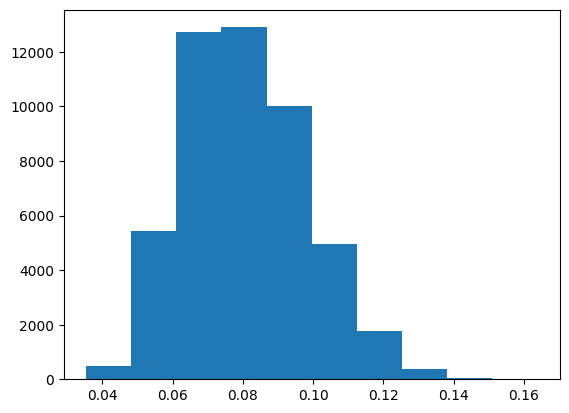

In [75]:
plt.hist(log_reg_pred)

Seluruh prediksi bernilai < 0.5

In [76]:
# Save the submission to a csv file
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/log_reg_baseline2.csv', index = False)

### Random Forest
score = 0.69144, fit sedikit lama

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [84]:
# Perform Cross-Validation
scores = cross_validate(random_forest, train, train_labels, cv=kfold, scoring=scoring, return_estimator=True) # new

# Print Average Scores
print("Average ROC AUC: {:.2f}".format(np.mean(scores['test_roc_auc'])))
print("Average F1 Score: {:.2f}".format(np.mean(scores['test_f1'])))

# Train on the training data
random_forest.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel

Average ROC AUC: 0.71
Average F1 Score: 0.00


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

Average ROC AUC: 0.71

Average F1 Score: 0.00

In [85]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished


In [86]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())
# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

   SK_ID_CURR  TARGET
0      100001    0.11
1      100005    0.10
2      100013    0.04
3      100028    0.06
4      100038    0.14


In [87]:
# Sort the DataFrame by 'importance' in descending order
feature_importances = feature_importances.sort_values(by='importance', ascending=False)[:30]

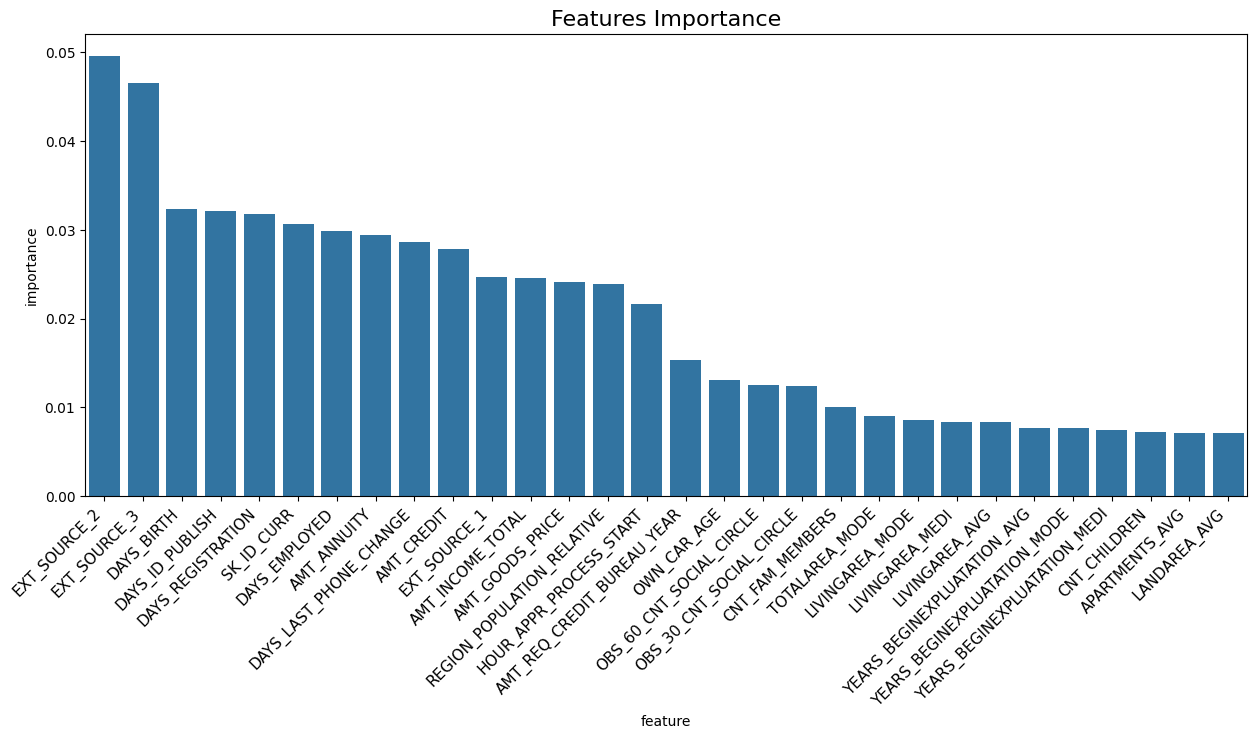

In [88]:
# Increase figure size
plt.figure(figsize=(15, 6))

# Plot the barplot
plt.title('Features Importance', fontsize=16)
s = sns.barplot(x='feature', y='importance', data=feature_importances)

# Rotate labels and adjust font size
s.set_xticklabels(s.get_xticklabels(), rotation=45, ha='right', fontsize=11)

plt.show()

### SGD
score = 0.72653

In [90]:
from sklearn.linear_model import SGDClassifier

In [91]:
sgd_classifier = SGDClassifier(loss='modified_huber', random_state=2024)

In [92]:
# Perform Cross-Validation
scores = cross_validate(sgd_classifier, train, train_labels, cv=kfold, scoring=scoring, return_estimator=True) # new

# Print Average Scores
print("Average ROC AUC: {:.2f}".format(np.mean(scores['test_roc_auc'])))
print("Average F1 Score: {:.2f}".format(np.mean(scores['test_f1'])))

sgd_classifier.fit(train, train_labels)

Average ROC AUC: 0.73
Average F1 Score: 0.00


SGDClassifier(loss='modified_huber', random_state=2024)

Average ROC AUC: 0.73

Average F1 Score: 0.00

In [93]:
# Make predictions on the test data
predictions = sgd_classifier.predict_proba(test)[:, 1]

In [94]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/sgd_classifier_baseline.csv', index = False)

   SK_ID_CURR    TARGET
0      100001  0.048618
1      100005  0.227278
2      100013  0.026307
3      100028  0.041053
4      100038  0.192634


## KNN
*fit terlalu lama* Score = 0.55377

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, verbose=1)
knn.fit(train, train_labels)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test data
predictions = knn.predict_proba(test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/knn_baseline.csv', index = False)

   SK_ID_CURR  TARGET
0      100001     0.2
1      100005     0.2
2      100013     0.0
3      100028     0.0
4      100038     0.2


model terbaik sebelum feature engineering = sgd_sclassifier

## Feature Engineering
### Domain knowledge engineering
Terdapat beberapa poin penting yang diperlukan untuk menentukan bahwa seseorang akan mengalami kesulitan membayar atau tidak dalam ranah peminjaman. Beberapa contohnya adalah:
1. DAYS_EMPLOYED_PERCENT: rasio antara lama kerja client terhadap umurnya
2. INCOME_CREDIT_PERCENT: rasio antara pendapaatan client dengan jumlah pinjaman
3. INCOME_PER_PERSON : membagi pendapatan client dengan jumlah keluarga
4. ANNUITY_INCOME_PERCENT: rasio annuity dan pendapatan client
5. PAYMENT_RATE: lamanya pembayaran dalam bulan (annuity adalah pembayaran per bulan)age

In [ ]:
def add_features(df):
    print(f'before: {df.shape}')
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    print(f'after: {df.shape}')

In [ ]:
add_features(train_df)
add_features(test_df)

before: (307511, 240)
after: (307511, 245)
before: (48744, 239)
after: (48744, 244)


### Polynomial features

Polynomial features untuk beberapa kolom yang sekiranya memiliki korelasi (belum analisis, baru berdasarkan domain knowledge)

In [ ]:
features_to_engineer = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
                        'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL',
                        'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS']

In [ ]:
poly_train = train_df[features_to_engineer]
poly_test = test_df[features_to_engineer]

In [ ]:
# imputer for handling missing values
imputer = SimpleImputer(strategy = 'median')

poly_target = train_df['TARGET']

# poly_train = poly_train.drop(columns = ['TARGET'])

# Need to impute missing values
poly_train = imputer.fit_transform(poly_train)
poly_test = imputer.transform(poly_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train the polynomial features
# IMPORTANT: RUN ONCE
poly_transformer.fit(poly_train)

# Transform the features
poly_train = poly_transformer.transform(poly_train)
poly_test = poly_transformer.transform(poly_test)

In [ ]:
print('Polynomial train df shape: ', poly_train.shape)
print('Polynomial test df shape: ', poly_test.shape)

Polynomial train df shape:  (307511, 220)
Polynomial test df shape:  (48744, 220)


In [ ]:
poly_transformer.get_feature_names_out(features_to_engineer)

array(['1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_3^2', 'EXT_SOURCE_3 EXT_SOURCE_2',
       'EXT_SOURCE_3 EXT_SOURCE_1', 'EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_3 DAYS_EMPLOYED', 'EXT_SOURCE_3 AMT_INCOME_TOTAL',
       'EXT_SOURCE_3 AMT_CREDIT', 'EXT_SOURCE_3 AMT_ANNUITY',
       'EXT_SOURCE_3 CNT_FAM_MEMBERS', 'EXT_SOURCE_2^2',
       'EXT_SOURCE_2 EXT_SOURCE_1', 'EXT_SOURCE_2 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_EMPLOYED', 'EXT_SOURCE_2 AMT_INCOME_TOTAL',
       'EXT_SOURCE_2 AMT_CREDIT', 'EXT_SOURCE_2 AMT_ANNUITY',
       'EXT_SOURCE_2 CNT_FAM_MEMBERS', 'EXT_SOURCE_1^2',
       'EXT_SOURCE_1 DAYS_BIRTH', 'EXT_SOURCE_1 DAYS_EMPLOYED',
       'EXT_SOURCE_1 AMT_INCOME_TOTAL', 'EXT_SOURCE_1 AMT_CREDIT',
       'EXT_SOURCE_1 AMT_ANNUITY', 'EXT_SOURCE_1 CNT_FAM_MEMBERS',
       'DAYS_BIRTH^2', 'DAYS_BIRTH DAYS_EMPLOYED',
       'DAYS_BIRTH AMT_INCO

In [ ]:
# Create a dataframe of the features
poly_train = pd.DataFrame(poly_train, columns = poly_transformer.get_feature_names_out(features_to_engineer))
# Add in the target
poly_train['TARGET'] = poly_target

In [ ]:
# Find the correlations with the target
poly_corrs = poly_train.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))
del poly_corrs

EXT_SOURCE_3 EXT_SOURCE_2      -0.193939
EXT_SOURCE_2 EXT_SOURCE_1      -0.166625
EXT_SOURCE_3 EXT_SOURCE_1      -0.164065
EXT_SOURCE_2                   -0.160295
EXT_SOURCE_3                   -0.155892
EXT_SOURCE_2^2                 -0.149512
EXT_SOURCE_3^2                 -0.141662
EXT_SOURCE_1                   -0.098887
EXT_SOURCE_2 CNT_FAM_MEMBERS   -0.097060
EXT_SOURCE_1^2                 -0.091034
Name: TARGET, dtype: float64
EXT_SOURCE_1 DAYS_BIRTH    0.104882
EXT_SOURCE_3 DAYS_BIRTH    0.150109
EXT_SOURCE_2 DAYS_BIRTH    0.156873
TARGET                     1.000000
1                               NaN
Name: TARGET, dtype: float64


In [ ]:
# Put test features into dataframe
poly_test = pd.DataFrame(poly_test,
            columns = poly_transformer.get_feature_names_out(features_to_engineer))

In [ ]:
# Merge polynomial features into training dataframe
poly_train['SK_ID_CURR'] = train_df['SK_ID_CURR']
app_train_pd = train_df.merge(poly_train, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_test['SK_ID_CURR'] = test_df['SK_ID_CURR']
app_test_pd = test_df.merge(poly_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_pd, app_test_pd = app_train_pd.align(app_test_pd, join = 'inner', axis = 1)
app_train_pd['TARGET'] = train_df['TARGET']
# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_pd.shape)
print('Testing data with polynomial features shape:  ', app_test_pd.shape)

Training data with polynomial features shape:  (307511, 465)
Testing data with polynomial features shape:   (48744, 464)


## Model setelah feature engineering

### Logistic Regression

In [ ]:
train, test, features = preprocess(app_train_pd, app_test_pd)

Training data shape:  (307511, 464)
Testing data shape:  (48744, 464)


In [ ]:
# train_f = pd.DataFrame(train, columns=features)
# del train_f

In [ ]:
# print(train_f.columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL_x', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'AMT_INCOME_TOTAL^2', 'AMT_INCOME_TOTAL AMT_CREDIT',
       'AMT_INCOME_TOTAL AMT_ANNUITY', 'AMT_INCOME_TOTAL CNT_FAM_MEMBERS',
       'AMT_CREDIT^2', 'AMT_CREDIT AMT_ANNUITY', 'AMT_CREDIT CNT_FAM_MEMBERS',
       'AMT_ANNUITY^2', 'AMT_ANNUITY CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS^2'],
      dtype='object', length=299)


In [ ]:
print('Training data with polynomial features shape: ', app_train_pd.shape)
print('Testing data with polynomial features shape:  ', app_test_pd.shape)

Training data with polynomial features shape:  (307511, 465)
Testing data with polynomial features shape:   (48744, 464)


In [ ]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [ ]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

   SK_ID_CURR    TARGET
0      100001  0.055831
1      100005  0.134170
2      100013  0.040855
3      100028  0.063273
4      100038  0.134103


(array([ 3478., 13108., 13317.,  9203.,  5286.,  2641.,  1171.,   412.,
          106.,    22.]),
 array([0.01001775, 0.03534368, 0.06066961, 0.08599554, 0.11132147,
        0.1366474 , 0.16197333, 0.18729926, 0.21262519, 0.23795112,
        0.26327705]),
 <BarContainer object of 10 artists>)

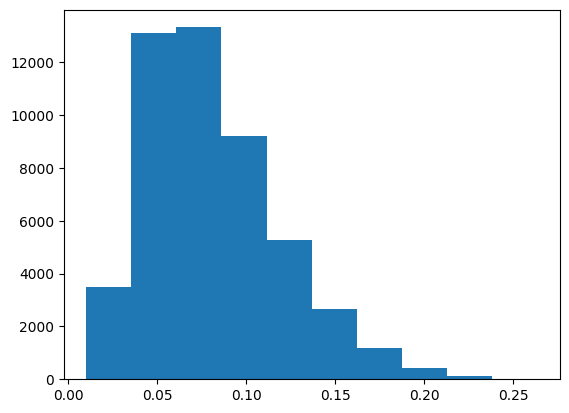

In [ ]:
# Submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

print(submit.head())
plt.hist(log_reg_pred)

In [ ]:
# Save the submission to a csv file
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/log_reg2.csv', index = False)

### SGD

In [ ]:
sgd_classifier = SGDClassifier(loss='modified_huber', random_state=2024)

In [ ]:
sgd_classifier.fit(train, train_labels)

SGDClassifier(loss='modified_huber', random_state=2024)

In [ ]:
# Make predictions on the test data
predictions = sgd_classifier.predict_proba(test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
print(submit.head())
# Save the submission dataframe
submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/sgd_classifier2.csv', index = False)

   SK_ID_CURR    TARGET
0      100001  0.060654
1      100005  0.292475
2      100013  0.069724
3      100028  0.000000
4      100038  0.220870


### Random Forest
*terlalu lama*

In [ ]:
# # Make the random forest classifier
# random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# # Train on the training data
# random_forest.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.2min finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [ ]:
# # Extract feature importances
# feature_importance_values = random_forest.feature_importances_
# feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# # Make predictions on the test data
# predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


In [ ]:
# # Make a submission dataframe
# submit = test_df[['SK_ID_CURR']]
# submit['TARGET'] = predictions
# print(submit.head())
# # Save the submission dataframe
# submit.to_csv('/content/gdrive/MyDrive/RAKAMIN/random_forest.csv', index = False)

   SK_ID_CURR  TARGET
0      100001    0.09
1      100005    0.10
2      100013    0.01
3      100028    0.05
4      100038    0.13


In [ ]:
# # Sort the DataFrame by 'importance' in descending order
# feature_importances = feature_importances.sort_values(by='importance', ascending=False)[:30]

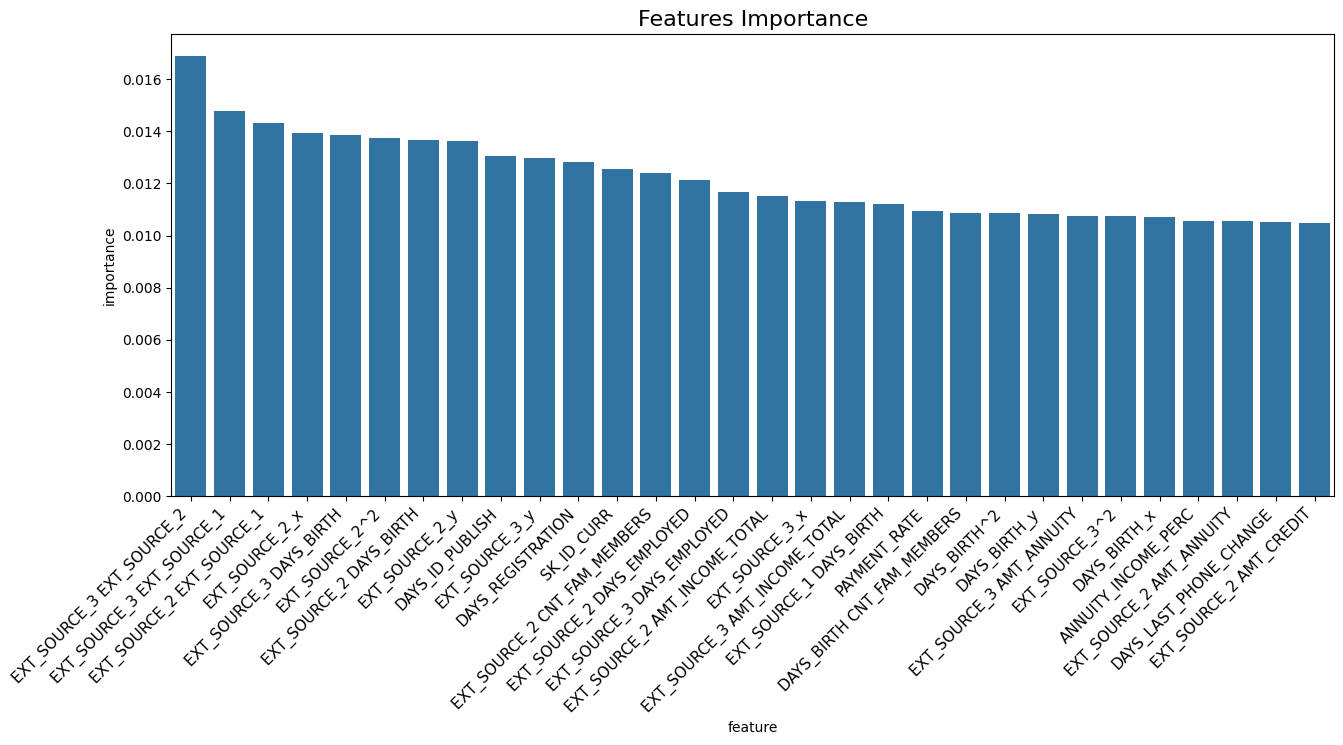

In [ ]:
# # Increase figure size
# plt.figure(figsize=(15, 6))

# # Plot the barplot
# plt.title('Features Importance', fontsize=16)
# s = sns.barplot(x='feature', y='importance', data=feature_importances)

# # Rotate labels and adjust font size
# s.set_xticklabels(s.get_xticklabels(), rotation=45, ha='right', fontsize=11)

# plt.show()

## Kesimpulan Model
SGD konsisten menghasilkan score lebih besar. Selanjutnya hanya akan menggunakan SGD

## Penggabungan dengan data previous dan burreau
Penggabungan akan menggunakan agregat untuk data previous dan burreau